## **Connecting with Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzipping
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/dataset/train.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

## **Import Modules**

In [ ]:
import pandas as pd
import numpy as np
import librosa  #------- To display the sound in image
import librosa.display
import glob
import seaborn as sns
import random
import matplotlib.pyplot as plt
import IPython.display as ipd #--------- provides tools for displaying various types of media
%pylab inline

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## **Loading The Dataset**

In [ ]:
# Output Classes
df = pd.read_csv("/content/train.csv")
df.head()

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark


In [ ]:
ipd.Audio('/content/Train/4.wav')

## **Exploratory Data Analysis**

In [ ]:
# Loading the audio & convert into array
data, sampling_rate = librosa.load('Train/1.wav') #---data means array & sampling_rate - no of splits/sec

In [ ]:
# array of audio-1
data

array([-0.09316424, -0.14310586,  0.05254411, ..., -0.01574724,
       -0.0098122 ,  0.09794901], dtype=float32)

In [ ]:
# no of splits/sec for audio-1
sampling_rate

22050

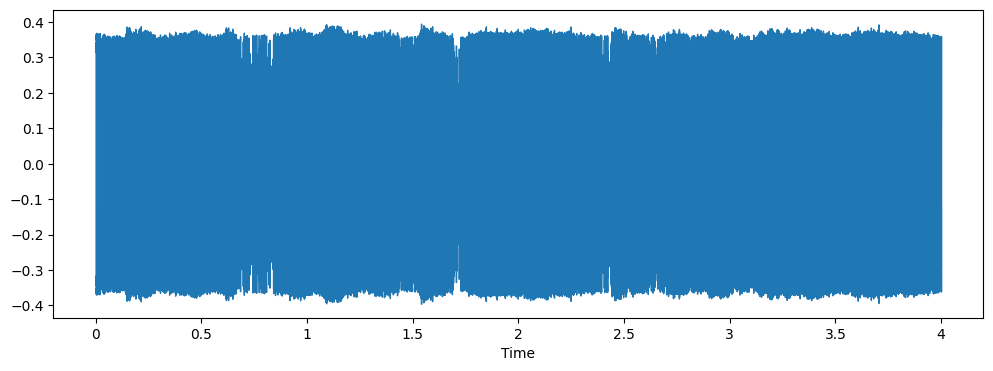

In [ ]:
# visualizing the audio
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)

Class: engine_idling


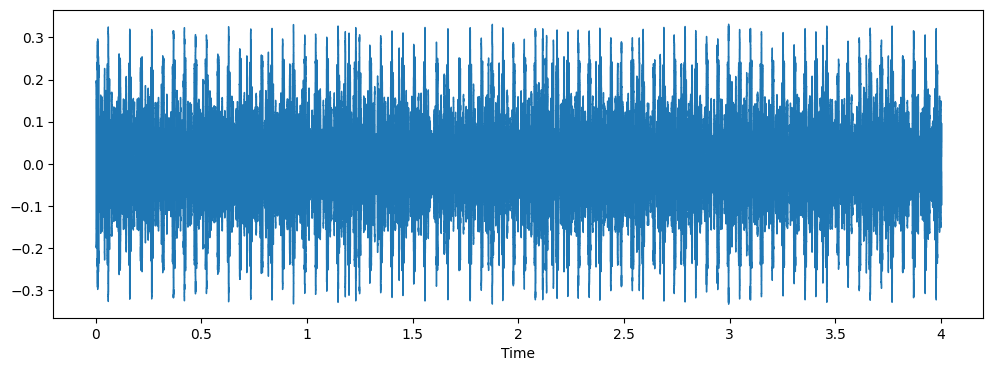

In [ ]:
# Visualizing random audios in the data
index = random.choice(df.index)

print('Class:', df['Class'][index])
data, sampling_rate = librosa.load('Train/'+str(df['ID'][index]) + '.wav')

plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)

Class: engine_idling


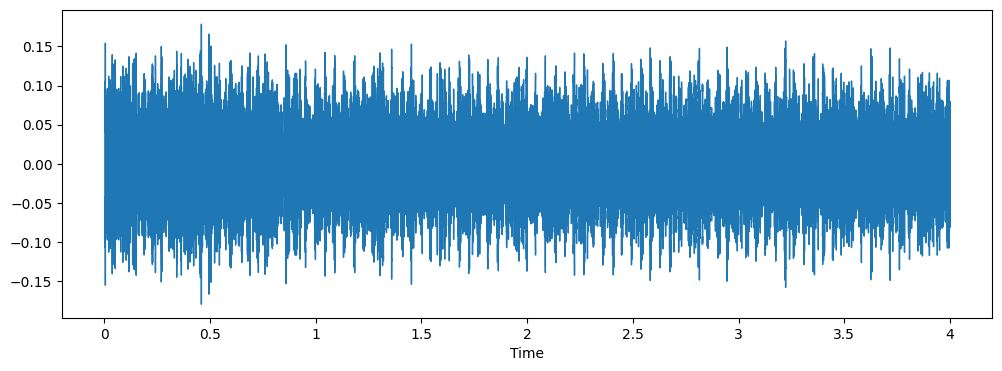

In [ ]:
index = random.choice(df.index)

print('Class:', df['Class'][index])
data, sampling_rate = librosa.load('Train/'+str(df['ID'][index]) + '.wav')

plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)

Class: siren


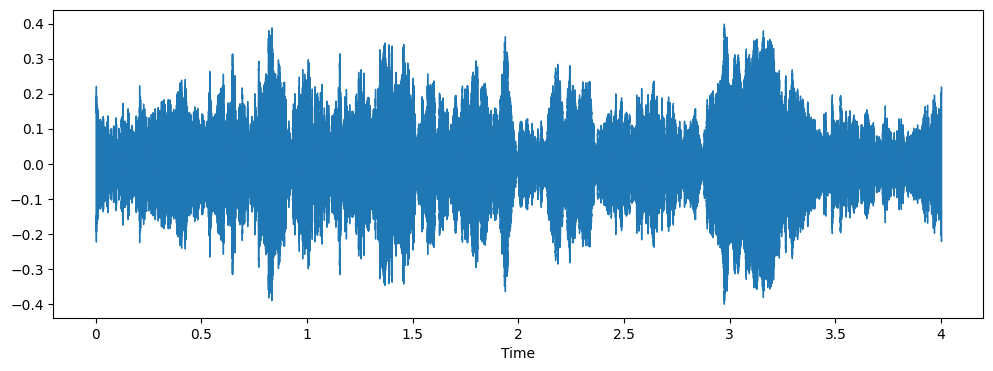

In [ ]:
index = random.choice(df.index)

print('Class:', df['Class'][index])
data, sampling_rate = librosa.load('Train/'+str(df['ID'][index]) + '.wav')

plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr=sampling_rate)

<Axes: >

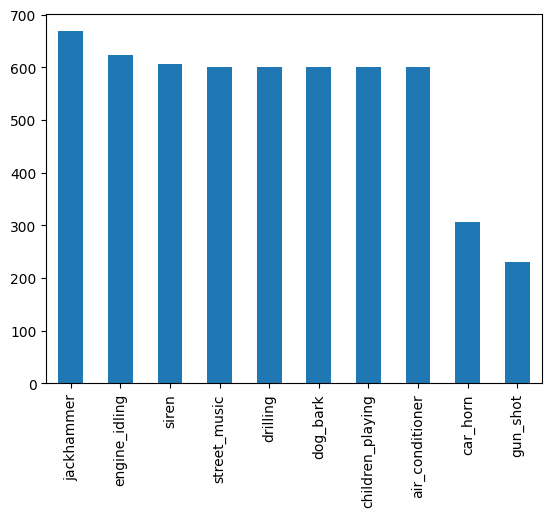

In [ ]:
# countplot for no of output classes
df['Class'].value_counts().plot(kind='bar')

## **Input Split**

In [ ]:
# Feature extraction from the audio file

import os

def parser(row):
  # path of the file
  file_name = os.path.join('Train',str(row.ID) + '.wav')
  # load the audio file
  x, sample_rate = librosa.load(file_name)
  # extract features from the data
  mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis = 0) ## --- creates the 40 features

  feature = mfccs
  label = row.Class

  return [feature,label]

data = df.apply(parser,axis=1)

In [ ]:
# Input data contains array of audio & label
data[0]

[array([-7.4750420e+01,  1.2871107e+02, -3.1763479e+01,  1.4368915e+01,
        -1.4911337e+00,  1.3714688e+01, -2.8801510e+00,  1.7068224e+01,
        -1.1206963e+00,  1.3553746e+01, -2.7443400e-01,  7.8215332e+00,
        -2.8822782e+00,  2.5542576e+00, -5.5827184e+00, -7.1990740e-01,
        -7.9543667e+00, -7.7281564e-02, -4.6713338e+00,  2.0170996e+00,
        -8.4534818e-01,  9.0096819e-01, -2.0468848e+00,  3.6702683e+00,
        -1.4444754e+00,  4.3866029e+00, -1.3263315e+00, -7.8453690e-01,
        -3.7138107e+00,  1.0914079e+00, -2.6545298e+00,  1.4211586e+00,
        -2.8687761e+00,  3.9707705e-01, -2.4884865e+00,  9.8981822e-01,
        -6.9058537e-01,  9.1334528e-01, -4.0000410e+00,  4.3764374e-01],
       dtype=float32),
 'siren']

In [ ]:
# split data into X, y
X = np.array(list(zip(*data))[0])
y = np.array(list(zip(*data))[1])

## **Label Encoding**

In [40]:
import pickle

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
y = np_utils.to_categorical(le.fit_transform(y)) #---- first it convert into numerical classes then OHE

In [41]:
pickle.dump(le,open('labelencoder.pkl','wb'))

In [ ]:
y.shape

(5435, 10)

## **Model Training**

In [ ]:
# Model Creation
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

## number of output classes
num_classes = 10

model = Sequential()
model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Model Compilation
model.compile(loss='categorical_crossentropy',metrics='accuracy',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               1

In [ ]:
# Traing the model
history = model.fit(X, y, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
136/136 [==============================] - 4s 11ms/step - loss: 4.6868 - accuracy: 0.1826 - val_loss: 2.1450 - val_accuracy: 0.2944
Epoch 2/100
136/136 [==============================] - 1s 10ms/step - loss: 2.1454 - accuracy: 0.2468 - val_loss: 1.9559 - val_accuracy: 0.3569
Epoch 3/100
136/136 [==============================] - 1s 9ms/step - loss: 1.9090 - accuracy: 0.3144 - val_loss: 1.6358 - val_accuracy: 0.4508
Epoch 4/100
136/136 [==============================] - 1s 9ms/step - loss: 1.7018 - accuracy: 0.3956 - val_loss: 1.4590 - val_accuracy: 0.4811
Epoch 5/100
136/136 [==============================] - 1s 10ms/step - loss: 1.5160 - accuracy: 0.4664 - val_loss: 1.3421 - val_accuracy: 0.5373
Epoch 6/100
136/136 [==============================] - 1s 9ms/step - loss: 1.3609 - accuracy: 0.5161 - val_loss: 1.1762 - val_accuracy: 0.6109
Epoch 7/100
136/136 [==============================] - 1s 9ms/step - loss: 1.2328 - accuracy: 0.5807 - val_loss: 1.0447 - val_accuracy: 0.6

In [33]:
model.save('best_model.h5')

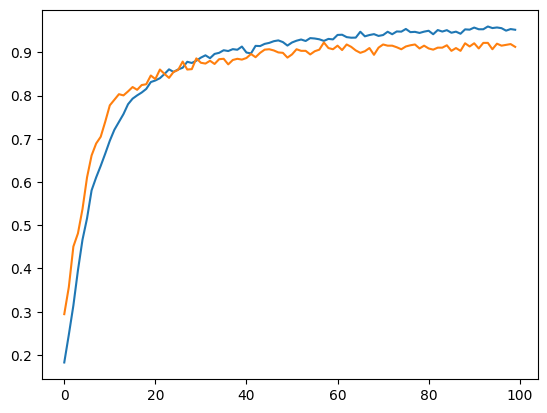

In [ ]:
# Plotting the Accuracy curve
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

## **Prediction**

In [ ]:
def feature_extraction(audio_path):
  x, sample_rate = librosa.load(audio_path)
  mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis = 0)
  feature = mfccs.reshape(1,-1)
  return feature

In [27]:
feature = feature_extraction('/content/Train/1.wav')

In [28]:
feature.shape

(1, 40)

In [37]:
pre = model.predict(feature).argmax(axis=1)[0]

1/1 [==============================] - 0s 36ms/step


In [38]:
pre

9

In [30]:
class_mapping = {num_label: class_label for num_label, class_label in enumerate(le.classes_)}

In [39]:
class_mapping

'street_music'

## **Streamlit Application**

In [32]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 26.7 MB/s eta 0:00:00


In [70]:
# Creating app file
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob
import seaborn as sns
import random
import matplotlib.pyplot as plt
import IPython.display as ipd
import pickle
from tensorflow.keras.models import load_model
import os

# Loading
model = load_model('best_model.h5')
le = pickle.load(open('labelencoder.pkl','rb'))

# Feature Extraction
def feature_extraction(audio_path):
  x, sample_rate = librosa.load(audio_path)
  mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis = 0)
  feature = mfccs.reshape(1,-1)
  return feature

# Saving the uploaded audio
def save_uploaded_file(uploaded_file):
  try:
    with open(os.path.join('uploads',uploaded_file.name),'wb') as f:
      f.write(uploaded_file.getbuffer())
    return 1
  except:
    return 0

class_mapping = {num_label: class_label for num_label, class_label in enumerate(le.classes_)}

st.title('Sound Classification')

uploaded_file = st.file_uploader("Choose an audio:")
if uploaded_file is not None:
  if save_uploaded_file(uploaded_file):
    audio_bytes = uploaded_file.read()
    st.audio(audio_bytes)

    feature = feature_extraction(os.path.join('uploads',uploaded_file.name))
    predicted_class = model.predict(feature).argmax(axis=1)[0]

    st.subheader("predicted Audio is: " + class_mapping[predicted_class].title())
  else:
    st.header("Some Error")


Overwriting app.py


In [71]:
!wget -q -O - ipv4.icanhazip.com

34.75.41.210


In [73]:
!streamlit run app.py & npx localtunnel --port 8501

[##................] - fetchMetadata: sill resolveWithNewModule ms@2.1.2 checki


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.75.41.210:8501

npx: installed 22 in 4.588s
your url is: https://seven-walls-obey.loca.lt
2023-08-23 14:29:31.241436: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
1/1 [==============================] - 0s 163ms/step
  Stopping...
^C
